### Working with spatial-temporal data

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import skmob
from skmob.preprocessing import detection, clustering

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.simplefilter("ignore")

 - original data come from: https://www.datarepository.movebank.org/handle/10255/move.834

In [2]:
events = pd.read_csv("GalapagostortoiseMovementEcology Programme_2009_2018.csv",sep=',')

 - take a look at the shape of the data, notice 1.8 million rows

In [3]:
events.shape

(1841253, 24)

 - what does the raw data look like?

In [4]:
events.head()

,event-id,visible,timestamp,location-long,location-lat,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,eobs:speed-accuracy-estimate,eobs:start-timestamp,eobs:status,eobs:temperature,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,33691529,True,2010-09-23 16:00:00.000,NaN,NaN,3686,3598,NaN,2636949985,NaN,2010-09-23 16:00:00.000,D,17,0,150,NaN,NaN,NaN,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
1,33691530,True,2010-09-23 17:00:49.998,-91.103888,-0.456140,3696,3623,3.07,4135080321,2.32,2010-09-23 17:00:00.000,A,17,3,49,0.17,16.38,1033.3,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
2,33691531,True,2010-09-23 18:00:32.000,-91.103888,-0.456140,3702,3635,3.84,3798461165,2.57,2010-09-23 18:00:01.000,A,19,3,31,0.33,3.28,1035.9,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
3,33691532,True,2010-09-23 19:00:29.000,-91.103904,-0.456151,3710,3642,3.84,3942563785,2.56,2010-09-23 19:00:00.000,A,22,3,29,0.12,19.66,1034.9,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
4,33691533,True,2010-09-23 20:00:55.999,-91.103904,-0.456153,3710,3635,3.07,683273842,2.28,2010-09-23 19:59:59.000,A,22,3,56,0.19,6.55,1038.5,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme


In [5]:
type(events.timestamp[1])

str

 - looing at the timestemp, it is of type "str", we want to parse it as datetime type
 - this can be done by specifying parse_date in read_csv

In [6]:
events = pd.read_csv("GalapagostortoiseMovementEcology Programme_2009_2018.csv", sep=',', parse_dates=[2])

In [7]:
type(events.timestamp[1])

pandas._libs.tslibs.timestamps.Timestamp

 - learn about what the columns mean
 - semantics of the columns is provided in a README file: https://www.datarepository.movebank.org/bitstream/handle/10255/move.835/README.txt?sequence=2
 

In [8]:
events.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'eobs:battery-voltage', 'eobs:fix-battery-voltage',
       'eobs:horizontal-accuracy-estimate', 'eobs:key-bin-checksum',
       'eobs:speed-accuracy-estimate', 'eobs:start-timestamp', 'eobs:status',
       'eobs:temperature', 'eobs:type-of-fix', 'eobs:used-time-to-get-fix',
       'ground-speed', 'heading', 'height-above-ellipsoid',
       'manually-marked-outlier', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name'],
      dtype='object')

 - we may want to keep those columns
 cols = ['event-id', 'timestamp', 'location-long', 'location-lat', 'eobs:temperature',
       'ground-speed', 'heading', 'height-above-ellipsoid',
       'manually-marked-outlier', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name']
 - but first, change columne names: replace "-" and ":" with "_"
 - can use pd.DataFrame.set_axis to change all column names with a new list of column names
 - can use pd.Series.str.replace to replace the "patterns" in the Series by replacement patterns

In [9]:
new_cols = pd.Series(events.columns.values).str.replace(pat = r"[-:]", repl="_")
tortoise = events.set_axis(labels = new_cols, axis =1, copy = True).assign()

In [10]:
tortoise.head()

,event_id,visible,timestamp,location_long,location_lat,eobs_battery_voltage,eobs_fix_battery_voltage,eobs_horizontal_accuracy_estimate,eobs_key_bin_checksum,eobs_speed_accuracy_estimate,eobs_start_timestamp,eobs_status,eobs_temperature,eobs_type_of_fix,eobs_used_time_to_get_fix,ground_speed,heading,height_above_ellipsoid,manually_marked_outlier,sensor_type,individual_taxon_canonical_name,tag_local_identifier,individual_local_identifier,study_name
0,33691529,True,2010-09-23 16:00:00.000,NaN,NaN,3686,3598,NaN,2636949985,NaN,2010-09-23 16:00:00.000,D,17,0,150,NaN,NaN,NaN,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
1,33691530,True,2010-09-23 17:00:49.998,-91.103888,-0.456140,3696,3623,3.07,4135080321,2.32,2010-09-23 17:00:00.000,A,17,3,49,0.17,16.38,1033.3,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
2,33691531,True,2010-09-23 18:00:32.000,-91.103888,-0.456140,3702,3635,3.84,3798461165,2.57,2010-09-23 18:00:01.000,A,19,3,31,0.33,3.28,1035.9,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
3,33691532,True,2010-09-23 19:00:29.000,-91.103904,-0.456151,3710,3642,3.84,3942563785,2.56,2010-09-23 19:00:00.000,A,22,3,29,0.12,19.66,1034.9,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme
4,33691533,True,2010-09-23 20:00:55.999,-91.103904,-0.456153,3710,3635,3.07,683273842,2.28,2010-09-23 19:59:59.000,A,22,3,56,0.19,6.55,1038.5,NaN,gps,Chelonoidis,1392,Sparkey,Galapagos Tortoise Movement Ecology Programme


In [11]:
tortoise.shape, tortoise.nunique()

((1841253, 24),
 event_id                             1841253
 visible                                    2
 timestamp                            1567017
 location_long                         881115
 location_lat                          852446
 eobs_battery_voltage                     483
 eobs_fix_battery_voltage                 890
 eobs_horizontal_accuracy_estimate        377
 eobs_key_bin_checksum                1840713
 eobs_speed_accuracy_estimate            2661
 eobs_start_timestamp                  366452
 eobs_status                                3
 eobs_temperature                          74
 eobs_type_of_fix                           2
 eobs_used_time_to_get_fix               1042
 ground_speed                            1882
 heading                                  550
 height_above_ellipsoid                 13208
 manually_marked_outlier                    1
 sensor_type                                1
 individual_taxon_canonical_name            4
 tag_local_identif

 - 1.8million events, but only 800k unique lat/long? is it because of NA? we saw NAs in the lat/long
 - use pd.DataFrame.notna() to find out

In [12]:
tortoise.notna().sum()

event_id                             1841253
visible                              1841253
timestamp                            1841253
location_long                        1796385
location_lat                         1796385
eobs_battery_voltage                 1841253
eobs_fix_battery_voltage             1841253
eobs_horizontal_accuracy_estimate    1796385
eobs_key_bin_checksum                1841253
eobs_speed_accuracy_estimate         1796385
eobs_start_timestamp                 1841253
eobs_status                          1841253
eobs_temperature                     1841253
eobs_type_of_fix                     1841253
eobs_used_time_to_get_fix            1841253
ground_speed                         1796385
heading                              1796385
height_above_ellipsoid               1796385
manually_marked_outlier                  494
sensor_type                          1841253
individual_taxon_canonical_name      1841253
tag_local_identifier                 1841253
individual

 - "manually_marked_outlier" has 494 notna , which means human examiner had marked them as True, an unmarked outliers are left with NAs
 - we can drop those "marked outliers"
 - how to drop the rows whose column "manually_marked_outlier" is not NA
 - use pd.DataFrame.drop(), need to specify by index value?

In [13]:
tortoise.drop(tortoise.index[tortoise["manually_marked_outlier"].notna()], inplace = True)
tortoise.notna().sum()

event_id                             1840759
visible                              1840759
timestamp                            1840759
location_long                        1795892
location_lat                         1795892
eobs_battery_voltage                 1840759
eobs_fix_battery_voltage             1840759
eobs_horizontal_accuracy_estimate    1795892
eobs_key_bin_checksum                1840759
eobs_speed_accuracy_estimate         1795892
eobs_start_timestamp                 1840759
eobs_status                          1840759
eobs_temperature                     1840759
eobs_type_of_fix                     1840759
eobs_used_time_to_get_fix            1840759
ground_speed                         1795892
heading                              1795892
height_above_ellipsoid               1795892
manually_marked_outlier                    0
sensor_type                          1840759
individual_taxon_canonical_name      1840759
tag_local_identifier                 1840759
individual

 - now we can drop the column "manually_marked_outlier"
 - how to drop one column in place?

In [14]:
tortoise.drop(columns =["manually_marked_outlier"], inplace=True)

 - all the columns related to observation measures have the same number of NAs, perhaps they happen on the same event?
 - how can we find out whether the NAs on different columns happen on the same set of rows?
 - can use isna.any() 

In [15]:
tortoise.isna().any(axis=1).sum()

44867

 - this is the same number as the differences between the total number of rows and individual column non-NAs 

In [16]:
(1840759 - 1795892)

44867

 - because we are mainly interested in the events that have geolocations, we can drop those rows
 - how to drop the rows that have NA in any one of its columns? 
 - first get the index of those rows: tortoise.isna().any(axis=1)
 - then drop them using pd.DataFrame.drop, can do inplace = True

In [17]:
tortoise.drop(index = tortoise.index[tortoise.isna().any(axis=1)], inplace=True)

In [18]:
tortoise.isna().sum()

event_id                             0
visible                              0
timestamp                            0
location_long                        0
location_lat                         0
eobs_battery_voltage                 0
eobs_fix_battery_voltage             0
eobs_horizontal_accuracy_estimate    0
eobs_key_bin_checksum                0
eobs_speed_accuracy_estimate         0
eobs_start_timestamp                 0
eobs_status                          0
eobs_temperature                     0
eobs_type_of_fix                     0
eobs_used_time_to_get_fix            0
ground_speed                         0
heading                              0
height_above_ellipsoid               0
sensor_type                          0
individual_taxon_canonical_name      0
tag_local_identifier                 0
individual_local_identifier          0
study_name                           0
dtype: int64

In [19]:
tortoise.describe()

,event_id,location_long,location_lat,eobs_battery_voltage,eobs_fix_battery_voltage,eobs_horizontal_accuracy_estimate,eobs_key_bin_checksum,eobs_speed_accuracy_estimate,eobs_temperature,eobs_type_of_fix,eobs_used_time_to_get_fix,ground_speed,heading,height_above_ellipsoid,tag_local_identifier
count,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1795892.0,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06,1.795892e+06
mean,1.342114e+09,-9.044068e+01,-7.028889e-01,3.762065e+03,3.640497e+03,9.602931e+00,2.146423e+09,3.146404e+00,1.848886e+01,3.0,3.756154e+01,2.712565e-01,1.543643e+02,3.259310e+02,1.798036e+03
std,2.106486e+09,4.207012e-01,2.626618e-01,8.441225e+01,1.404529e+02,9.223903e+00,1.240122e+09,3.001424e+00,7.924963e+00,0.0,2.286243e+01,1.803277e+00,1.531188e+02,3.226248e+02,1.114890e+03
min,3.369138e+07,-9.118597e+01,-1.385838e+00,3.427000e+03,2.946000e+03,1.540000e+00,6.611500e+04,1.000000e-01,-1.200000e+01,3.0,3.000000e+00,0.000000e+00,0.000000e+00,-2.847200e+03,7.650000e+02
25%,7.754146e+07,-9.046015e+01,-7.004788e-01,3.715000e+03,3.583000e+03,4.100000e+00,1.072144e+09,1.570000e+00,1.300000e+01,3.0,2.000000e+01,8.000000e-02,7.860000e+00,1.210000e+02,1.380000e+03
50%,2.683602e+08,-9.041491e+01,-6.607453e-01,3.740000e+03,3.625000e+03,6.140000e+00,2.146260e+09,2.910000e+00,1.800000e+01,3.0,3.500000e+01,1.600000e-01,6.554000e+01,1.698000e+02,1.394000e+03
75%,1.748313e+09,-9.024347e+01,-6.311809e-01,3.760000e+03,3.664000e+03,1.126000e+01,3.219692e+09,4.040000e+00,2.400000e+01,3.0,5.400000e+01,2.900000e-01,3.362000e+02,3.517000e+02,1.410000e+03
max,7.674895e+09,-8.965603e+01,-3.619578e-01,4.086000e+03,4.075000e+03,9.830000e+01,4.294965e+09,6.553500e+02,6.300000e+01,3.0,1.590000e+02,4.752100e+02,3.597900e+02,1.690220e+04,5.275000e+03


 - Chelonoidis porteri	-- The western Santa Cruz tortoise is a subspecies of Galápagos tortoise endemic to Santa Cruz Island in the Galápagos. They are found only on the southwestern slopes of the island, with an estimated range of 141 sq. kilometers. 
 - Carolina -- 1930
 - Gnasher
 - Chelonoidis donfaustoi -- Chelonoidis niger donfaustoi, known as the eastern Santa Cruz tortoise, is a subspecies of Galápagos tortoise living on Santa Cruz Island, within the Galápagos. Until 2015, C. n. donfaustoi was classified as part of another subspecies, Chelonoidis porteri.
 - Alison

 - Chelonoidis -- Chelonoidis is a genus of turtles in the tortoise family erected by Leopold Fitzinger in 1835. They are found in South America and the Galápagos Islands, and formerly had a wide distribution in the West Indies. The multiple subspecies of the Galápagos tortoise are among the largest extant terrestrial chelonians.
 - Christian -- vandenburghi


 - Chelonoidis hoodensis -- The Hood Island giant tortoise is a subspecies of Galápagos tortoise endemic to Española Island in the Galápagos.





In [20]:
tortoise.columns

Index(['event_id', 'visible', 'timestamp', 'location_long', 'location_lat',
       'eobs_battery_voltage', 'eobs_fix_battery_voltage',
       'eobs_horizontal_accuracy_estimate', 'eobs_key_bin_checksum',
       'eobs_speed_accuracy_estimate', 'eobs_start_timestamp', 'eobs_status',
       'eobs_temperature', 'eobs_type_of_fix', 'eobs_used_time_to_get_fix',
       'ground_speed', 'heading', 'height_above_ellipsoid', 'sensor_type',
       'individual_taxon_canonical_name', 'tag_local_identifier',
       'individual_local_identifier', 'study_name'],
      dtype='object')

In [21]:
cols = ['event_id', 'timestamp', 'location_long', 'location_lat',
       'eobs_temperature', 'ground_speed', 'heading', 'height_above_ellipsoid',
       'individual_taxon_canonical_name', 'tag_local_identifier',
       'individual_local_identifier']
tortoise = tortoise[cols].assign()
tortoise['year'] = tortoise["timestamp"].dt.year
tortoise['month'] = tortoise["timestamp"].dt.month
tortoise['date'] = tortoise["timestamp"].dt.date
tortoise['day'] = tortoise["timestamp"].dt.day
tortoise['hour'] = tortoise["timestamp"].dt.hour
tortoise['weekday'] = tortoise["timestamp"].dt.weekday
tortoise['year_month'] = tortoise["timestamp"].apply(lambda t: t.strftime("%Y-%m"))
tortoise['year_week'] = tortoise["timestamp"].apply(lambda t: t.strftime("%Y-%W")) 

In [22]:
tortoise[["timestamp", "location_long", "location_lat", "eobs_temperature", "ground_speed", "heading", "height_above_ellipsoid"]].head(10)

,timestamp,location_long,location_lat,eobs_temperature,ground_speed,heading,height_above_ellipsoid
1,2010-09-23 17:00:49.998,-91.103888,-0.456140,17,0.17,16.38,1033.3
2,2010-09-23 18:00:32.000,-91.103888,-0.456140,19,0.33,3.28,1035.9
3,2010-09-23 19:00:29.000,-91.103904,-0.456151,22,0.12,19.66,1034.9
4,2010-09-23 20:00:55.999,-91.103904,-0.456153,22,0.19,6.55,1038.5
5,2010-09-23 21:00:15.001,-91.103918,-0.456149,22,0.21,13.76,1032.5
6,2010-09-23 22:00:43.999,-91.103925,-0.456123,22,0.10,7.86,1028.3
7,2010-09-23 23:00:25.999,-91.103951,-0.456125,18,0.21,133.04,1024.7
8,2010-09-24 00:00:19.998,-91.104032,-0.456170,15,0.11,8.52,1016.2
9,2010-09-24 01:00:56.998,-91.103877,-0.456109,11,0.20,343.41,1035.4
10,2010-09-24 11:00:50.998,-91.104021,-0.456098,5,0.10,342.75,1024.2


In [23]:
temp_df = tortoise.groupby(["individual_taxon_canonical_name","individual_local_identifier"]).agg(events_count = ("event_id", "count"))
temp_df.sort_values(by="events_count", ascending=False).head(100)

events_count
individual_taxon_canonical_name individual_local_identifier              
Chelonoidis porteri             Gnasher                             86050
                                Valencia                            84075
                                Sebastian                           51320
                                Carolina                            45420
Chelonoidis donfaustoi          Wilman                              44501
Chelonoidis                     Christian                           42509
                                Sparkey                             42406
                                Martin                              41965
Chelonoidis porteri             Steve Devine                        41803
Chelonoidis                     Anne                                41110
Chelonoidis donfaustoi          Alison                              40003
                                Kitty                               39955
                                Herbert                             39715
                                Sandra                              39595
                                Karla                               39253
                                Marilyn                             39232
Chelonoidis porteri             Iggy                                39161
Chelonoidis                     Greg                                38789
Chelonoidis porteri             Lolo                                38700
Chelonoidis                     Franz                               36409
Chelonoidis donfaustoi          Helber                              34646
                                Nigrita                             34273
Chelonoidis                     Jeneene                             31886
Chelonoidis porteri             Lore                                31494
Chelonoidis hoodensis           Zelfa                               30973
                                Nathalie                            30714
Chelonoidis donfaustoi          Connor                              30607
Chelonoidis                     Franz' girlie                       30185
Chelonoidis porteri             Lucy                                30034
Chelonoidis                     Birgit                              28314
                                Isabela                             28214
                                Spikey                              26750
Chelonoidis hoodensis           Emma Espanola                       25545
Chelonoidis porteri             Chrissie                            25350
                                Sepp                                23711
Chelonoidis hoodensis           Skandar's Girlfriend                20507
Chelonoidis donfaustoi          Narcissa                            20360
Chelonoidis porteri             Veronica                            20032
Chelonoidis donfaustoi          Samy                                19207
Chelonoidis porteri             Sir David                           18557
                                Yvonne                              18333
                                Mandy                               18328
Chelonoidis donfaustoi          Maria                               18114
Chelonoidis hoodensis           Randal                              17604
Chelonoidis porteri             Delmira                             17416
Chelonoidis donfaustoi          Melina                              16526
                                Fredy                               15281
Chelonoidis porteri             Karlitos                            14359
                                Wacho                               13392
Chelonoidis hoodensis           Miriam                              13091
                                Skandar                             13078
                                Walter                              13001
Chelonoidis donfaustoi          Jumbo                            

In [24]:
tortoise_trajectory = skmob.TrajDataFrame(tortoise, latitude='location_lat', longitude='location_long', \
    user_id='individual_local_identifier', datetime='timestamp', \
)
print(tortoise_trajectory.head())

   event_id                datetime        lng       lat  eobs_temperature  \
1  33691530 2010-09-23 17:00:49.998 -91.103888 -0.456140                17   
2  33691531 2010-09-23 18:00:32.000 -91.103888 -0.456140                19   
3  33691532 2010-09-23 19:00:29.000 -91.103904 -0.456151                22   
4  33691533 2010-09-23 20:00:55.999 -91.103904 -0.456153                22   
5  33691534 2010-09-23 21:00:15.001 -91.103918 -0.456149                22   

   ground_speed  heading  height_above_ellipsoid  \
1          0.17    16.38                  1033.3   
2          0.33     3.28                  1035.9   
3          0.12    19.66                  1034.9   
4          0.19     6.55                  1038.5   
5          0.21    13.76                  1032.5   

  individual_taxon_canonical_name  tag_local_identifier      uid  year  month  \
1                     Chelonoidis                  1392  Sparkey  2010      9   
2                     Chelonoidis                  1392 

### examine what is special about trajectory dataframe
 - what has been added from the original dataframe
 - what has been changed from the original dataframe
 - etc.

In [25]:
tortoise.columns

Index(['event_id', 'timestamp', 'location_long', 'location_lat',
       'eobs_temperature', 'ground_speed', 'heading', 'height_above_ellipsoid',
       'individual_taxon_canonical_name', 'tag_local_identifier',
       'individual_local_identifier', 'year', 'month', 'date', 'day', 'hour',
       'weekday', 'year_month', 'year_week'],
      dtype='object')

In [26]:
tortoise_trajectory.columns

Index(['event_id', 'datetime', 'lng', 'lat', 'eobs_temperature',
       'ground_speed', 'heading', 'height_above_ellipsoid',
       'individual_taxon_canonical_name', 'tag_local_identifier', 'uid',
       'year', 'month', 'date', 'day', 'hour', 'weekday', 'year_month',
       'year_week'],
      dtype='object')

 - tag_local_identifier is the tag ID, and individual_local_identifier is the tortoise' unique name
 - tag_local_identifier were re-used on different tutles over time, need to use tortoise name "individual_local_identifier"

In [27]:
df1 = tortoise.groupby(["tag_local_identifier"]).agg(cnt = ("individual_local_identifier", "nunique",)).reset_index()
df1[df1.cnt>1]

,tag_local_identifier,cnt
14,1378,2
21,1385,2
23,1387,2
32,1396,2
34,1398,2
37,1401,2
42,1406,2
43,1407,3
48,3133,2
61,3148,2


 - some tortoise have used two tags
 - who are they, what should we know about the re-use of tags? 
 

In [28]:
df1 = tortoise.groupby(["individual_local_identifier"]).agg(cnt = ("tag_local_identifier", "nunique",)).reset_index()
df1[df1.cnt>1]

,individual_local_identifier,cnt
51,Mandy,2
62,Nigrita,2
68,Samuel,2
70,Sandra,2
71,Sebastian,2


### most likely they just reused the GPS devices, but how can we be sure? were there gaps in between when they switched devices? 
 - how would you find out if there were any gaps in data collection for these tortoises? who had gaps and who did hot?
 - (only Mandy did not have obvious gap, others do

In [29]:
alison = tortoise[tortoise["individual_local_identifier"] == "Alison"]

In [30]:
pd.DataFrame(alison.max().values,alison.min().values)

,0
46119247,7513055046
2010-09-17 17:01:25.998000,2018-10-01 16:00:29.998000
-90.2750203,-90.239427
-0.6561777,-0.629772
-2,35
0.0,61.1
0.0,359.79
-139.1,630.6
Chelonoidis donfaustoi,Chelonoidis donfaustoi
1402,1402


 - even though there is duplicates among lat/long, we should keep them

In [31]:
alison[["location_lat", "location_long"]]

,location_lat,location_long
1290187,-0.635366,-90.241889
1290188,-0.635563,-90.242230
1290189,-0.635515,-90.242210
1290190,-0.635356,-90.242227
1290191,-0.635276,-90.242101
...,...,...
1332568,-0.635341,-90.243718
1332569,-0.635348,-90.243748
1332570,-0.635363,-90.243731
1332571,-0.635290,-90.243696


 - tag-local-identifier have been re-used in the dataset
 - e.g., 1378 for Skandar and Yvonne

In [32]:
tortoise_trajectory.shape

(1795892, 19)

<Axes: xlabel='timestamp', ylabel='location_long'>

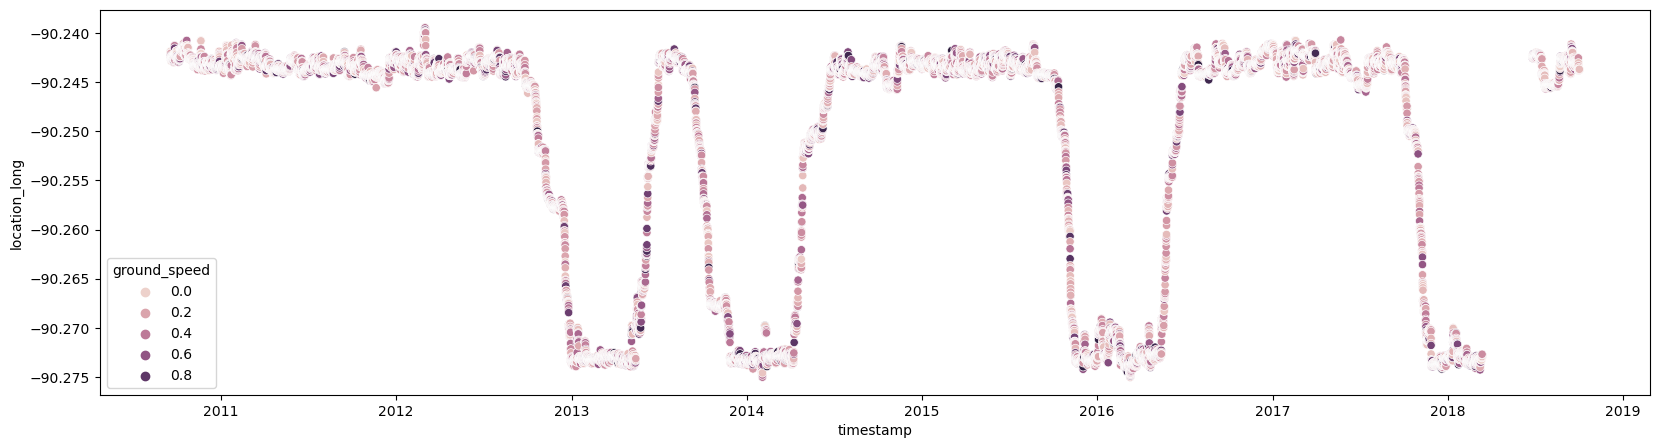

In [33]:
plt.figure(figsize = (20,5))
alison = tortoise.query("individual_local_identifier == 'Alison' and ground_speed <1") # ground_speed unit is meters per second
sns.scatterplot(alison, x = "timestamp", y="location_long", hue="ground_speed")


<Axes: xlabel='timestamp', ylabel='location_lat'>

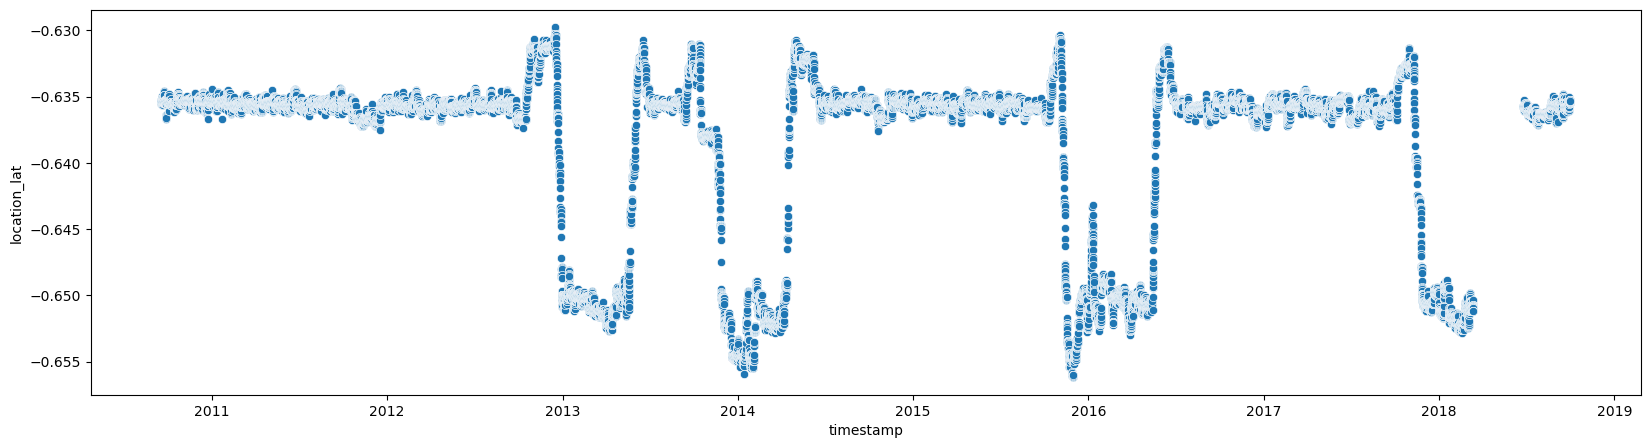

In [34]:
plt.figure(figsize = (20,5))
alison = tortoise[tortoise["individual_local_identifier"] == "Alison"]
sns.scatterplot(alison, x = "timestamp", y="location_lat")

In [35]:
def invidual_lat_long(name, lat_long):
    plt.figure(figsize = (20,5))
    df_name = tortoise[tortoise["individual_local_identifier"] == name]
    sns.scatterplot(df_name, x = "timestamp", y=lat_long)


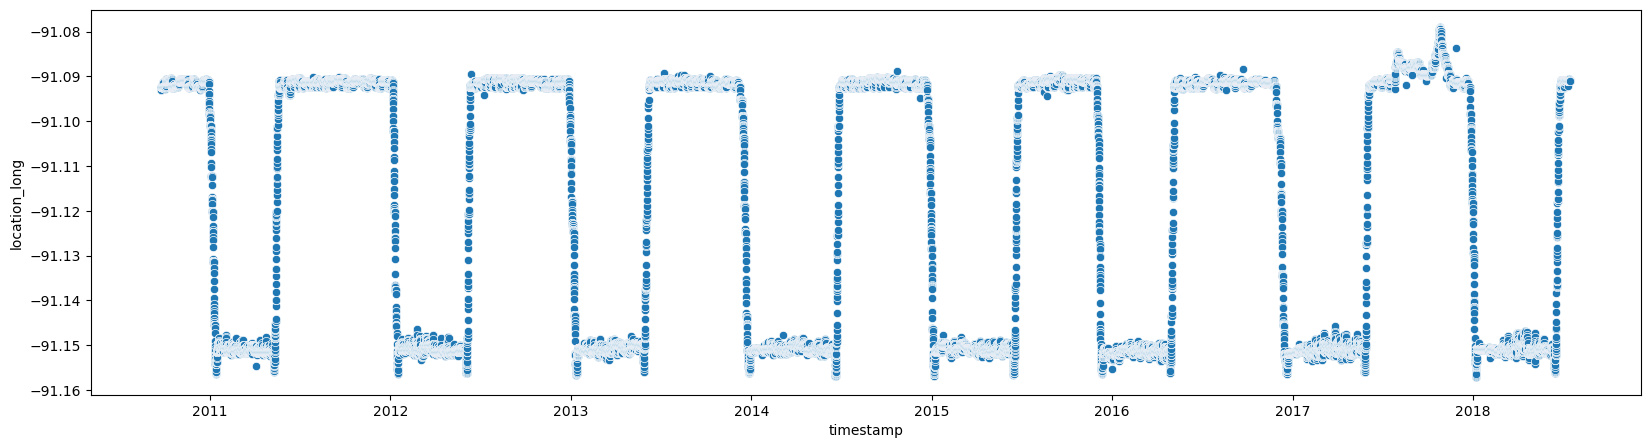

In [36]:
invidual_lat_long("Christian", "location_long")

In [37]:
temp_df = tortoise.groupby("individual_local_identifier").agg(max_time = ('timestamp', max), min_time = ('timestamp', min) )
temp_df["length"] = (temp_df.max_time - temp_df.min_time)
temp_df.sort_values(by="length")

,max_time,min_time,length
individual_local_identifier,,,
Roby,2016-06-17 16:02:07.000,2016-06-17 15:44:53.000,0 days 00:17:14
Lola,2013-11-26 09:01:00.998,2013-11-02 21:00:14.999,23 days 12:00:45.999000
Toots,2013-12-30 00:00:56.998,2013-11-20 00:00:50.001,40 days 00:00:06.997000
Andres,2017-02-06 13:23:23.000,2016-12-09 00:00:47.000,59 days 13:22:36
Freddy V,2013-11-22 12:00:57.001,2013-08-14 00:00:55.999,100 days 12:00:01.002000
Erbert,2013-11-27 12:00:45.000,2013-08-17 00:00:26.001,102 days 12:00:18.999000
Kiana,2013-12-04 11:45:08.000,2013-07-25 20:00:11.000,131 days 15:44:57
Graciella,2013-12-09 12:00:49.999,2013-07-20 00:00:56.000,142 days 11:59:53.999000
Johnny,2017-01-09 16:00:40.000,2016-08-15 00:00:56.999,147 days 15:59:43.001000


In [38]:
temp_df = tortoise.groupby(["individual_taxon_canonical_name","individual_local_identifier"]).agg(events_count = ("event_id", "count"))
temp_df.sort_values(by="events_count", ascending=False).head(100)

events_count
individual_taxon_canonical_name individual_local_identifier              
Chelonoidis porteri             Gnasher                             86050
                                Valencia                            84075
                                Sebastian                           51320
                                Carolina                            45420
Chelonoidis donfaustoi          Wilman                              44501
Chelonoidis                     Christian                           42509
                                Sparkey                             42406
                                Martin                              41965
Chelonoidis porteri             Steve Devine                        41803
Chelonoidis                     Anne                                41110
Chelonoidis donfaustoi          Alison                              40003
                                Kitty                               39955
                                Herbert                             39715
                                Sandra                              39595
                                Karla                               39253
                                Marilyn                             39232
Chelonoidis porteri             Iggy                                39161
Chelonoidis                     Greg                                38789
Chelonoidis porteri             Lolo                                38700
Chelonoidis                     Franz                               36409
Chelonoidis donfaustoi          Helber                              34646
                                Nigrita                             34273
Chelonoidis                     Jeneene                             31886
Chelonoidis porteri             Lore                                31494
Chelonoidis hoodensis           Zelfa                               30973
                                Nathalie                            30714
Chelonoidis donfaustoi          Connor                              30607
Chelonoidis                     Franz' girlie                       30185
Chelonoidis porteri             Lucy                                30034
Chelonoidis                     Birgit                              28314
                                Isabela                             28214
                                Spikey                              26750
Chelonoidis hoodensis           Emma Espanola                       25545
Chelonoidis porteri             Chrissie                            25350
                                Sepp                                23711
Chelonoidis hoodensis           Skandar's Girlfriend                20507
Chelonoidis donfaustoi          Narcissa                            20360
Chelonoidis porteri             Veronica                            20032
Chelonoidis donfaustoi          Samy                                19207
Chelonoidis porteri             Sir David                           18557
                                Yvonne                              18333
                                Mandy                               18328
Chelonoidis donfaustoi          Maria                               18114
Chelonoidis hoodensis           Randal                              17604
Chelonoidis porteri             Delmira                             17416
Chelonoidis donfaustoi          Melina                              16526
                                Fredy                               15281
Chelonoidis porteri             Karlitos                            14359
                                Wacho                               13392
Chelonoidis hoodensis           Miriam                              13091
                                Skandar                             13078
                                Walter                              13001
Chelonoidis donfaustoi          Jumbo                            

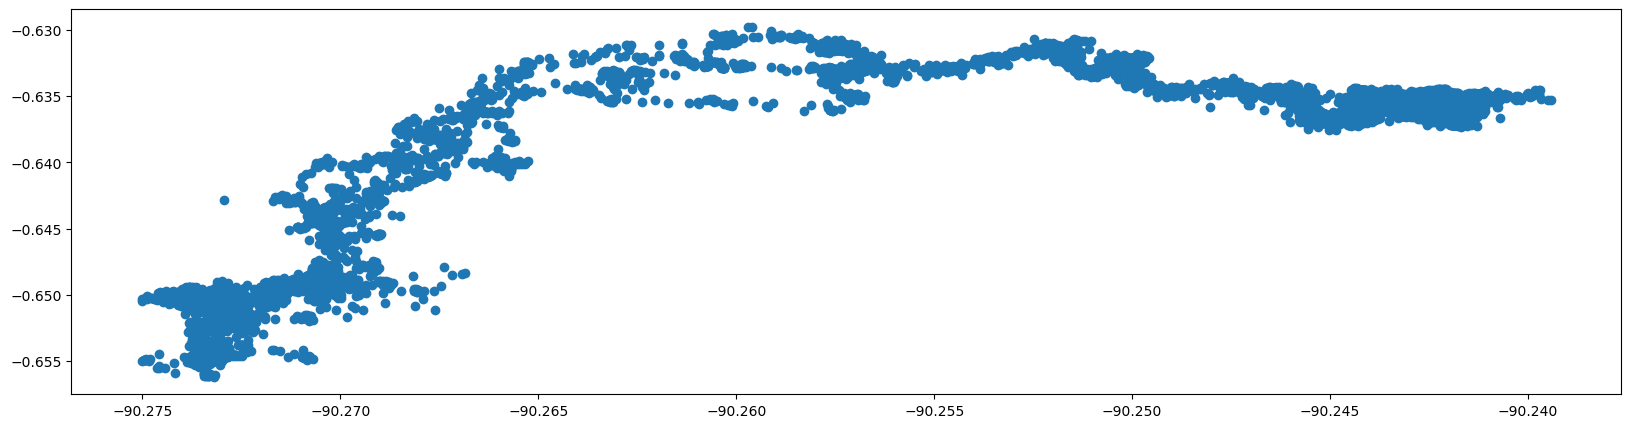

In [39]:
plt.figure(figsize = (20,5))
ax = plt.axes()
alison = tortoise[tortoise["individual_local_identifier"] == "Alison"]
plt.scatter(alison.location_long.values, alison.location_lat.values)

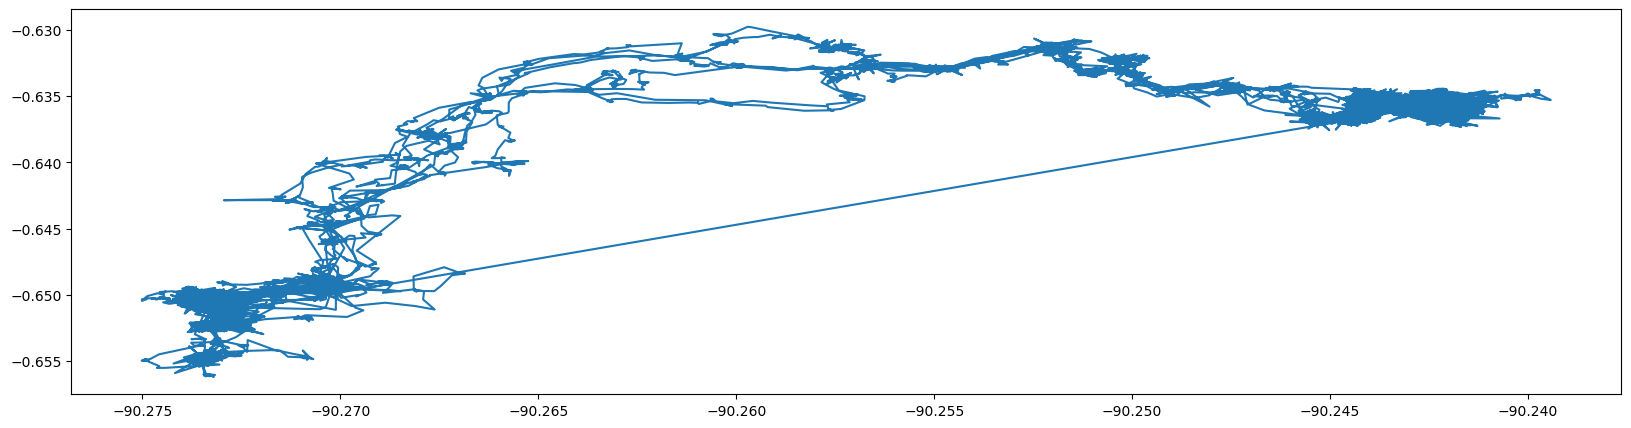

In [40]:
plt.figure(figsize = (20,5))
ax = plt.axes()
alison = tortoise[tortoise["individual_local_identifier"] == "Alison"]
ax.plot(alison.location_long.values, alison.location_lat.values)


In [41]:
alison_trajectory = skmob.TrajDataFrame(alison, latitude='location_lat', longitude='location_long', \
    user_id='individual_local_identifier', datetime='timestamp', \
)
print(alison_trajectory.head())

         event_id                datetime        lng       lat  \
1290187  46119277 2010-09-17 17:01:25.998 -90.241889 -0.635366   
1290188  46119278 2010-09-17 18:00:58.001 -90.242230 -0.635563   
1290189  46119279 2010-09-17 19:00:56.001 -90.242210 -0.635515   
1290190  46119280 2010-09-17 20:00:29.000 -90.242227 -0.635356   
1290191  46119281 2010-09-17 21:00:56.000 -90.242101 -0.635276   

         eobs_temperature  ground_speed  heading  height_above_ellipsoid  \
1290187                18          0.00   334.23                   181.1   
1290188                19          0.21    19.01                   143.6   
1290189                22          0.15   359.14                   171.4   
1290190                19          0.75    19.66                   156.2   
1290191                17          0.08   342.75                   160.4   

        individual_taxon_canonical_name  tag_local_identifier     uid  year  \
1290187          Chelonoidis donfaustoi                  1402  Alis